In [51]:
import pandas as pd
import numpy as np
import ast
from sklearn.preprocessing import MultiLabelBinarizer


In [52]:
df = pd.read_csv('langchain_student_params_v3.csv')

In [53]:
df.columns

Index(['conceptual_clarity_level', 'attention_span_category',
       'retention_strength', 'problem_solving_speed_sec', 'error_pattern',
       'growth_slope', 'response_to_feedback', 'revisions_per_week',
       'days_between_revisions', 'method_of_revision',
       'question_asking_nature', 'self_assessment_accuracy',
       'exploration_tendency', 'teacher_relationship_quality',
       'peer_learning_behavior', 'communication_clarity',
       'discussion_engagement', 'test_anxiety_level',
       'resilience_after_failure', 'motivation_intrinsic_vs_extrinsic',
       'achievement_orientation', 'emotional_self_awareness',
       'device_access_type', 'preferred_edtech_apps',
       'digital_distraction_level', 'input_method_preference',
       'highest_academic_level', 'study_space_quality',
       'academic_pressure_at_home', 'family_responsibilities_hrs',
       'support_system_strength', 'content_type_preference',
       'knowledge_graph_nodes_covered', 'ongoing_concept',
       'm

In [ ]:
df = df[['conceptual_clarity_level', 'attention_span_category',
       'retention_strength', 'problem_solving_speed_sec', 'error_pattern',
       'growth_slope', 'response_to_feedback', 'revisions_per_week',
       'days_between_revisions', 'method_of_revision',
       'question_asking_nature', 'self_assessment_accuracy',
       'exploration_tendency', 'teacher_relationship_quality',
       'peer_learning_behavior', 'communication_clarity',
       'discussion_engagement', 'test_anxiety_level',
       'resilience_after_failure', 'motivation_intrinsic_vs_extrinsic',
       'achievement_orientation', 'emotional_self_awareness',
       'device_access_type', 'preferred_edtech_apps',
       'digital_distraction_level', 'input_method_preference',
       'highest_academic_level', 'study_space_quality',
       'academic_pressure_at_home', 'family_responsibilities_hrs',
       'support_system_strength', 'content_type_preference',
       'knowledge_graph_nodes_covered', 'ongoing_concept',
       'metacognitive_skill_level','next_section']]

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2456 entries, 0 to 2455
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   conceptual_clarity_level           2456 non-null   int64  
 1   attention_span_category            2456 non-null   int64  
 2   retention_strength                 2456 non-null   float64
 3   problem_solving_speed_sec          2456 non-null   int64  
 4   error_pattern                      2456 non-null   object 
 5   growth_slope                       2456 non-null   float64
 6   response_to_feedback               2456 non-null   int64  
 7   revisions_per_week                 2456 non-null   int64  
 8   days_between_revisions             2456 non-null   int64  
 9   method_of_revision                 2456 non-null   object 
 10  question_asking_nature             2456 non-null   int64  
 11  self_assessment_accuracy           2456 non-null   float

In [55]:
df = df.drop_duplicates(subset=['conceptual_clarity_level', 'attention_span_category',
       'retention_strength', 'problem_solving_speed_sec', 'error_pattern',
       'growth_slope', 'response_to_feedback', 'revisions_per_week',
       'days_between_revisions', 'method_of_revision',
       'question_asking_nature', 'self_assessment_accuracy',
       'exploration_tendency', 'teacher_relationship_quality',
       'peer_learning_behavior', 'communication_clarity',
       'discussion_engagement', 'test_anxiety_level',
       'resilience_after_failure', 'motivation_intrinsic_vs_extrinsic',
       'achievement_orientation', 'emotional_self_awareness',
       'device_access_type', 'preferred_edtech_apps',
       'digital_distraction_level', 'input_method_preference',
       'highest_academic_level', 'study_space_quality',
       'academic_pressure_at_home', 'family_responsibilities_hrs',
       'support_system_strength', 'content_type_preference',
       'knowledge_graph_nodes_covered', 'ongoing_concept',
       'metacognitive_skill_level'],keep = False)

In [56]:
X = df.drop(columns = 'next_section')
y = df['next_section']

In [57]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2366 entries, 0 to 2455
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   conceptual_clarity_level           2366 non-null   int64  
 1   attention_span_category            2366 non-null   int64  
 2   retention_strength                 2366 non-null   float64
 3   problem_solving_speed_sec          2366 non-null   int64  
 4   error_pattern                      2366 non-null   object 
 5   growth_slope                       2366 non-null   float64
 6   response_to_feedback               2366 non-null   int64  
 7   revisions_per_week                 2366 non-null   int64  
 8   days_between_revisions             2366 non-null   int64  
 9   method_of_revision                 2366 non-null   object 
 10  question_asking_nature             2366 non-null   int64  
 11  self_assessment_accuracy           2366 non-null   float64
 1

# One-Hot Encoding Columns

In [58]:
for i in X.columns:
    if X[i].dtype == 'object':
        print(f"Column {i} is of type object")

Column error_pattern is of type object
Column method_of_revision is of type object
Column preferred_edtech_apps is of type object
Column input_method_preference is of type object
Column highest_academic_level is of type object
Column content_type_preference is of type object
Column knowledge_graph_nodes_covered is of type object
Column ongoing_concept is of type object


In [59]:
X = pd.get_dummies(X, columns=['error_pattern', 'input_method_preference', 'highest_academic_level', 'ongoing_concept'])

In [60]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2366 entries, 0 to 2455
Data columns (total 61 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   conceptual_clarity_level                   2366 non-null   int64  
 1   attention_span_category                    2366 non-null   int64  
 2   retention_strength                         2366 non-null   float64
 3   problem_solving_speed_sec                  2366 non-null   int64  
 4   growth_slope                               2366 non-null   float64
 5   response_to_feedback                       2366 non-null   int64  
 6   revisions_per_week                         2366 non-null   int64  
 7   days_between_revisions                     2366 non-null   int64  
 8   method_of_revision                         2366 non-null   object 
 9   question_asking_nature                     2366 non-null   int64  
 10  self_assessment_accuracy     

In [61]:
multi_label_cols = ['method_of_revision', 'preferred_edtech_apps','content_type_preference','knowledge_graph_nodes_covered']  # add other columns here

# 4. Convert and binarize each multi-label column
for col in multi_label_cols:
    # Parse string representation of lists into actual Python lists
    X[col] = X[col].apply(ast.literal_eval)
    
    # Binarize
    mlb = MultiLabelBinarizer()
    multi_dummies = mlb.fit_transform(X[col])

    # Create DataFrame of dummy columns with a prefix
    dummy_X = pd.DataFrame(
        multi_dummies,
        columns=[f"{col}_{c}" for c in mlb.classes_],
        index=X.index
    )
    
    # Join and drop original
    X = X.join(dummy_X).drop(columns=[col])

In [62]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2366 entries, 0 to 2455
Data columns (total 92 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   conceptual_clarity_level                               2366 non-null   int64  
 1   attention_span_category                                2366 non-null   int64  
 2   retention_strength                                     2366 non-null   float64
 3   problem_solving_speed_sec                              2366 non-null   int64  
 4   growth_slope                                           2366 non-null   float64
 5   response_to_feedback                                   2366 non-null   int64  
 6   revisions_per_week                                     2366 non-null   int64  
 7   days_between_revisions                                 2366 non-null   int64  
 8   question_asking_nature                               

# train-test-split(stratified)

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Applying PCA

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

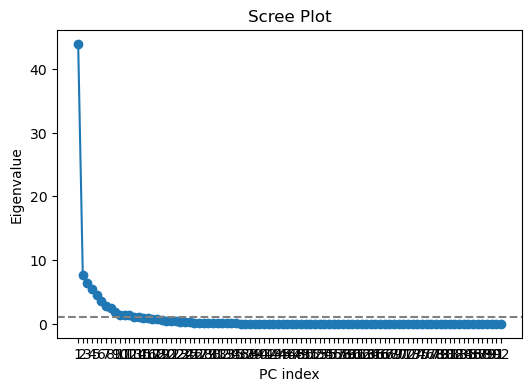

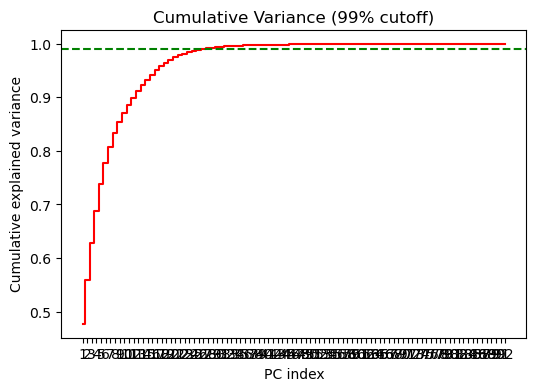

Number of principal components needed to capture at least 99% variance: 27


In [65]:
# 1) Standardize
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# 2) Full PCA fit (to inspect eigenvalues & variance)
pca_full = PCA()
pca_full.fit(X_train_scaled)

eigenvalues              = pca_full.explained_variance_
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance      = np.cumsum(explained_variance_ratio)
components = np.arange(1, len(eigenvalues) + 1)

# 3a) (Optional) Scree plot
plt.figure(figsize=(6,4))
plt.plot(components, eigenvalues, 'o-')
plt.axhline(1.0, linestyle='--', color='gray')
plt.xlabel('PC index'); plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.xticks(components)
plt.show()

# 3b) (Optional) Cumulative variance plot
threshold = 0.99
plt.figure(figsize=(6,4))
plt.step(components, cumulative_variance, where='mid', color='red')
plt.axhline(threshold, linestyle='--', color='green')
plt.xlabel('PC index'); plt.ylabel('Cumulative explained variance')
plt.title('Cumulative Variance (99% cutoff)')
plt.xticks(components)
plt.show()

# 4) Print number of components needed to reach the threshold
k = np.argmax(cumulative_variance >= threshold) + 1
print(f"Number of principal components needed to capture at least {threshold*100:.0f}% variance: {k}")


In [66]:

# 4) Determine k components to retain ≥ 90% variance
k = np.argmax(cumulative_variance >= threshold) + 1
print(f" Retaining k = {k} components to capture ≥ {threshold*100:.0f}% variance")

# 5) Re‐fit PCA with n_components=k and transform
pca = PCA(n_components=k)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)

 Retaining k = 27 components to capture ≥ 99% variance


# Applying the models

In [67]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, ExtraTreesClassifier,
    GradientBoostingClassifier, HistGradientBoostingClassifier,
    AdaBoostClassifier, BaggingClassifier
)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import (
    RandomOverSampler, SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
)
# from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids
# from imblearn.combine import SMOTEENN, SMOTETomek
# from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
import ast
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder

# === Part 1: Oversampled classifiers on X_train_reduced/X_test_reduced ===

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

samplers = {
    'NoSampling': None,
    'RandomOverSampler': RandomOverSampler(random_state=42),
    'SMOTE': SMOTE(k_neighbors=3,random_state=42),
    'BorderlineSMOTE': BorderlineSMOTE(k_neighbors = 3,random_state=42),
    # 'SVMSMOTE': SVMSMOTE(random_state=42),
    'ADASYN': ADASYN(n_neighbors=3, random_state=42)
}

models = {
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    'ExtraTrees': ExtraTreesClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'HistGradientBoosting': HistGradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=50, random_state=42),
    'Bagging': BaggingClassifier(n_estimators=10, random_state=42),
    'XGBoost': XGBClassifier(eval_metric='mlogloss', random_state=42),
    'LogisticRegression': LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    'SVM': SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'GaussianNB': GaussianNB(),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
}

results = []
trained_models = {}

for samp_name, sampler in samplers.items():
    if sampler:
        X_res, y_res = sampler.fit_resample(X_train_pca, y_train)
    else:
        X_res, y_res = X_train_pca, y_train

    for model_name, model in models.items():
        model.fit(X_res, y_res)
        trained_models[(samp_name, model_name)] = model

        y_pred = model.predict(X_test_pca)
        f1 = f1_score(y_test, y_pred, average='macro')  # or 'weighted'

        results.append({
            'Sampler': samp_name,
            'Model Name':   model_name,
            'Model': model,
            'Accuracy': accuracy_score(y_test, y_pred),
            'Macro F1': f1
        })
        print(f"Trained {model_name} with {samp_name}: macro F₁ = {f1:.4f}, accuracy = {accuracy_score(y_test, y_pred):.4f}")

# Final results table
results_df = pd.DataFrame(results).sort_values(by='Macro F1', ascending=False).reset_index(drop=True)
print("\n=== Combined Results ===")
print(results_df[['Sampler','Model Name','Macro F1','Accuracy']].to_string(index=False))

print("Accuracy based results:")
print(results_df[['Sampler','Model Name','Macro F1','Accuracy']].sort_values(by='Accuracy', ascending=False).to_string(index=False))


Trained DecisionTree with NoSampling: macro F₁ = 0.2124, accuracy = 0.3207
Trained RandomForest with NoSampling: macro F₁ = 0.2215, accuracy = 0.3397
Trained ExtraTrees with NoSampling: macro F₁ = 0.2173, accuracy = 0.3312
Trained GradientBoosting with NoSampling: macro F₁ = 0.2224, accuracy = 0.3502
Trained HistGradientBoosting with NoSampling: macro F₁ = 0.2002, accuracy = 0.3207
Trained AdaBoost with NoSampling: macro F₁ = 0.1892, accuracy = 0.3734
Trained Bagging with NoSampling: macro F₁ = 0.2169, accuracy = 0.3397
Trained XGBoost with NoSampling: macro F₁ = 0.2210, accuracy = 0.3418
Trained LogisticRegression with NoSampling: macro F₁ = 0.2264, accuracy = 0.3165
Trained SVM with NoSampling: macro F₁ = 0.2219, accuracy = 0.3228
Trained KNN with NoSampling: macro F₁ = 0.2335, accuracy = 0.3523
Trained GaussianNB with NoSampling: macro F₁ = 0.1749, accuracy = 0.2954


c:\micromamba\envs\ml\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Trained MLP with NoSampling: macro F₁ = 0.2239, accuracy = 0.3565
Trained DecisionTree with RandomOverSampler: macro F₁ = 0.2430, accuracy = 0.3312
Trained RandomForest with RandomOverSampler: macro F₁ = 0.2378, accuracy = 0.3418
Trained ExtraTrees with RandomOverSampler: macro F₁ = 0.2163, accuracy = 0.3312
Trained GradientBoosting with RandomOverSampler: macro F₁ = 0.2320, accuracy = 0.3270
Trained HistGradientBoosting with RandomOverSampler: macro F₁ = 0.2186, accuracy = 0.3249
Trained AdaBoost with RandomOverSampler: macro F₁ = 0.2394, accuracy = 0.3397
Trained Bagging with RandomOverSampler: macro F₁ = 0.2278, accuracy = 0.3270
Trained XGBoost with RandomOverSampler: macro F₁ = 0.2014, accuracy = 0.3186
Trained LogisticRegression with RandomOverSampler: macro F₁ = 0.2229, accuracy = 0.3143
Trained SVM with RandomOverSampler: macro F₁ = 0.2200, accuracy = 0.3059
Trained KNN with RandomOverSampler: macro F₁ = 0.2180, accuracy = 0.2954
Trained GaussianNB with RandomOverSampler: macro

c:\micromamba\envs\ml\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Trained MLP with RandomOverSampler: macro F₁ = 0.2691, accuracy = 0.3586
Trained DecisionTree with SMOTE: macro F₁ = 0.2167, accuracy = 0.3059
Trained RandomForest with SMOTE: macro F₁ = 0.2189, accuracy = 0.3207
Trained ExtraTrees with SMOTE: macro F₁ = 0.2152, accuracy = 0.3165
Trained GradientBoosting with SMOTE: macro F₁ = 0.2449, accuracy = 0.3376
Trained HistGradientBoosting with SMOTE: macro F₁ = 0.2015, accuracy = 0.3059
Trained AdaBoost with SMOTE: macro F₁ = 0.1946, accuracy = 0.3207
Trained Bagging with SMOTE: macro F₁ = 0.2215, accuracy = 0.3207
Trained XGBoost with SMOTE: macro F₁ = 0.2254, accuracy = 0.3312
Trained LogisticRegression with SMOTE: macro F₁ = 0.2137, accuracy = 0.3101
Trained SVM with SMOTE: macro F₁ = 0.2228, accuracy = 0.3165
Trained KNN with SMOTE: macro F₁ = 0.2378, accuracy = 0.3291
Trained GaussianNB with SMOTE: macro F₁ = 0.2014, accuracy = 0.2975


c:\micromamba\envs\ml\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Trained MLP with SMOTE: macro F₁ = 0.2527, accuracy = 0.3460
Trained DecisionTree with BorderlineSMOTE: macro F₁ = 0.2028, accuracy = 0.2954
Trained RandomForest with BorderlineSMOTE: macro F₁ = 0.2163, accuracy = 0.3228
Trained ExtraTrees with BorderlineSMOTE: macro F₁ = 0.2194, accuracy = 0.3207
Trained GradientBoosting with BorderlineSMOTE: macro F₁ = 0.2378, accuracy = 0.3376
Trained HistGradientBoosting with BorderlineSMOTE: macro F₁ = 0.2441, accuracy = 0.3418
Trained AdaBoost with BorderlineSMOTE: macro F₁ = 0.2178, accuracy = 0.3291
Trained Bagging with BorderlineSMOTE: macro F₁ = 0.2403, accuracy = 0.3481
Trained XGBoost with BorderlineSMOTE: macro F₁ = 0.2291, accuracy = 0.3312
Trained LogisticRegression with BorderlineSMOTE: macro F₁ = 0.2087, accuracy = 0.3143
Trained SVM with BorderlineSMOTE: macro F₁ = 0.2071, accuracy = 0.3143
Trained KNN with BorderlineSMOTE: macro F₁ = 0.2209, accuracy = 0.3143
Trained GaussianNB with BorderlineSMOTE: macro F₁ = 0.1884, accuracy = 0.28

c:\micromamba\envs\ml\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Trained MLP with BorderlineSMOTE: macro F₁ = 0.2190, accuracy = 0.3186
Trained DecisionTree with ADASYN: macro F₁ = 0.2096, accuracy = 0.2996
Trained RandomForest with ADASYN: macro F₁ = 0.2192, accuracy = 0.3186
Trained ExtraTrees with ADASYN: macro F₁ = 0.2036, accuracy = 0.3101
Trained GradientBoosting with ADASYN: macro F₁ = 0.2634, accuracy = 0.3502
Trained HistGradientBoosting with ADASYN: macro F₁ = 0.2294, accuracy = 0.3291
Trained AdaBoost with ADASYN: macro F₁ = 0.2085, accuracy = 0.3481
Trained Bagging with ADASYN: macro F₁ = 0.2437, accuracy = 0.3481
Trained XGBoost with ADASYN: macro F₁ = 0.2251, accuracy = 0.3270
Trained LogisticRegression with ADASYN: macro F₁ = 0.2316, accuracy = 0.3186
Trained SVM with ADASYN: macro F₁ = 0.2163, accuracy = 0.3038
Trained KNN with ADASYN: macro F₁ = 0.2042, accuracy = 0.2848
Trained GaussianNB with ADASYN: macro F₁ = 0.1868, accuracy = 0.2932
Trained MLP with ADASYN: macro F₁ = 0.2608, accuracy = 0.3544

=== Combined Results ===
       

c:\micromamba\envs\ml\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [68]:

# === Part 2: CatBoost on original X/y ===
df = pd.read_csv('/mnt/data/langchain_student_params_1300.csv').dropna()

# Binarize multi-label columns
ml_cols = ['method_of_revision','preferred_edtech_apps','knowledge_graph_nodes_covered']
for col in ml_cols:
    df[col] = df[col].apply(ast.literal_eval)
    mlb = MultiLabelBinarizer()
    dummies = mlb.fit_transform(df[col])
    df = df.join(pd.DataFrame(dummies,
                              columns=[f"{col}_{lbl}" for lbl in mlb.classes_],
                              index=df.index)).drop(columns=[col])

# Convert booleans to ints
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)

# Split for CatBoost
X2 = df.drop(columns=['next_section'])
y2 = df['next_section'].astype('category').cat.codes
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, stratify=y2, test_size=0.2, random_state=42
)

# Train CatBoost
cat_features = X2_train.select_dtypes(include=['object','category']).columns.tolist()
cb = CatBoostClassifier(iterations=500, learning_rate=0.05, depth=6,
                        eval_metric='Accuracy', random_seed=42, verbose=False)
cb.fit(X2_train, y2_train, cat_features=cat_features, eval_set=(X2_test, y2_test))
trained_models[('NoSampling', 'CatBoost')] = cb
y2_pred = cb.predict(X2_test)
cb_acc = accuracy_score(y2_test, y2_pred)
results.append({'Sampler': 'NoSampling', 'Model': 'CatBoost', 'Accuracy': cb_acc})
print(f"Trained CatBoost: accuracy = {cb_acc:.4f}")

# Final results table
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
print("\n=== Combined Results ===")
print(results_df.to_string(index=False))


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/langchain_student_params_1300.csv'